In [1]:
import os

if not os.path.exists('../thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

import numpy as np
import matplotlib.pyplot as plt
from thinkdsp import read_wave
from thinkdsp import decorate

## 1. perfect_pitch.wav를 read하고 소리를 들어보세요.

In [2]:
wave = read_wave('perfect_pitch.wav')
wave.make_audio()

### 총 5번의 소리가 들렸습니다.

## 2. perfect_pitch.wav의 framerate은?

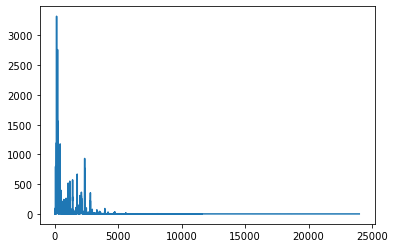

In [3]:
wave.make_spectrum().plot()

### 나이퀴스트 이론에 의해, 약 24,000 frequency까지 표현된 것으로 보아, 48,000 frame rate를 가진다고 볼 수 있습니다.

## 3. perfect_pitch.wav에서는 몇 개의 음계가 포함되어 있는가?

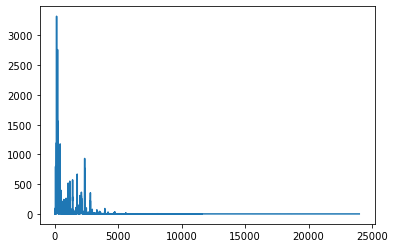

In [4]:
wave.make_spectrum().plot()

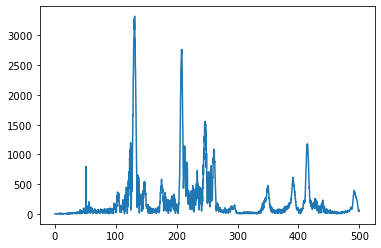

In [5]:
wave.make_spectrum().plot(high=500)

### ~ 500 사이 분포한 frequency중 값이 많이 분포한 frequency 조사해 보니 총 5개의 음계가 존재하는걸 확인할 수 있었습니다.

### ~~~
### 208 솔샾
### 247 시
### 261 도
### 290 레
### 349 파
### 415 솔샾
### 490 시
### ~~~

### 솔샾, 시, 도, 레, 파 5개의 음계 구조가 보였습니다!


## 4. spectrum 분석을 이용하여 perfect_pitch에 포함되어 있는 음을 모두 순서대로 찾으세요.

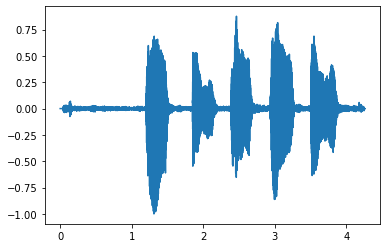

In [6]:
wave.plot()

### 첫 음인 1.2초 ~ 1.5초를 분석해보겠습니다.
### (시작 지점 끝지점은 위 사운드를 바로 plot해서 음계별 시간대 분포를 파악해서 알맞게 구했습니다)

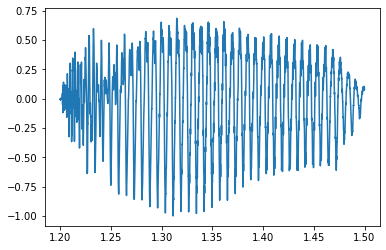

In [7]:
segment = wave.segment(start=1.2, duration=0.3)
segment.plot()

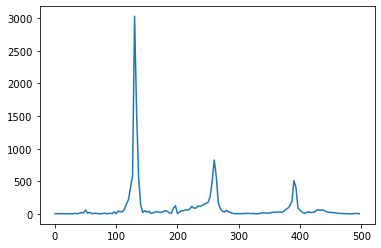

In [8]:
segment.make_spectrum().plot(500)

### 130, 260  ~~ 하모니를 가지는 도 음계 입니다!

### 두번째 음인 1.85초 ~ 2.15초를 분석해보겠습니다.

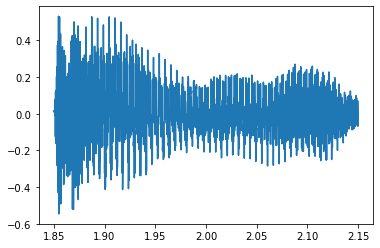

In [9]:
segment = wave.segment(start=1.85, duration=0.3)
segment.plot()

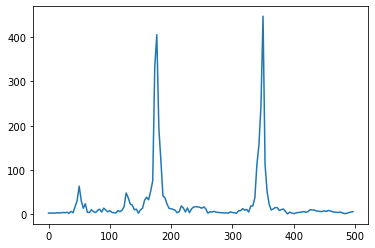

In [10]:
segment.make_spectrum().plot(500)

### 174, 349 ~~ 하모니를 가지는 파 음계 입니다!

### 세번째 음인 2.4초 ~ 2.7초를 분석해보겠습니다.

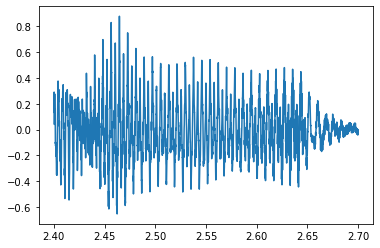

In [11]:
segment = wave.segment(start=2.4, duration=0.3)
segment.plot()

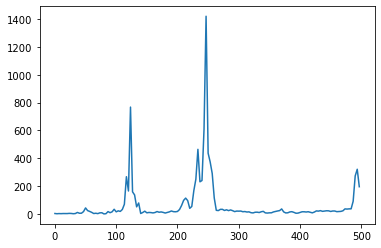

In [12]:
segment.make_spectrum().plot(500)

### 123, 246 ~~ 하모니를 가지는 시 음계 입니다!

### 네번째 음인 2.95초 ~ 3.25초를 분석해보겠습니다.

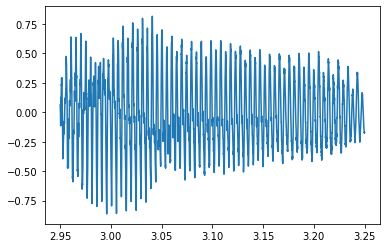

In [13]:
segment = wave.segment(start=2.95, duration=0.3)
segment.plot()

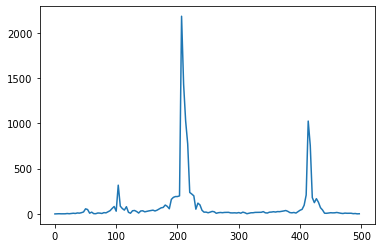

In [14]:
segment.make_spectrum().plot(500)

### 103, 207, 415 ~~ 하모니를 가지는 솔샾 음계 입니다!

### 다섯번째 음인 3.5초 ~ 3.8초를 분석해보겠습니다.

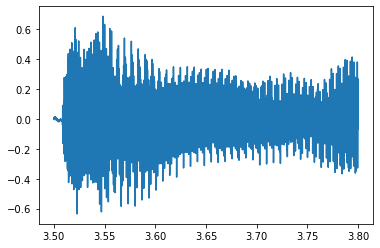

In [15]:
segment = wave.segment(start=3.5, duration=0.3)
segment.plot()

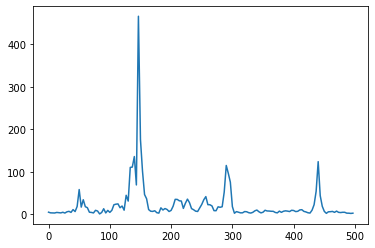

In [16]:
segment.make_spectrum().plot(500)

### 146, 294 하모니를 가지는 레 음계 입니다!

## 즉 도, 파, 시, 솔샾, 레 순으로 음계를 가지고 있습니다.

## 5. autocorrelation을 이용하여 perfect_pitch에 포함되어 있는 음을 모두 순서대로 찾으세요.

In [17]:
def serial_corr(wave, lag=1):
    n = len(wave)
    y1 = wave.ys[lag:]
    y2 = wave.ys[:n-lag]
    corr_mat = np.corrcoef(y1, y2)
    return corr_mat[0, 1]

In [18]:
def autocorr(wave):
    lags = np.arange(len(wave.ys)//2)
    corrs = [serial_corr(wave, lag) for lag in lags]
    return lags, corrs

In [19]:
def estimate_fundamental(segment, low, high):
    lags, corrs = autocorr(segment)
    lag = np.array(corrs[low:high]).argmax() + low
    period = lag / segment.framerate
    frequency = 1 / period
    return frequency

### 첫번째 음을 살펴보겠습니다.

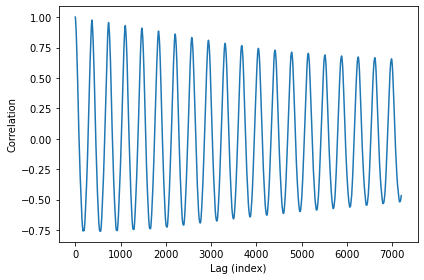

In [20]:
segment = wave.segment(start=1.2, duration=0.3)
lags, corrs = autocorr(segment)
plt.plot(lags, corrs)
decorate(xlabel='Lag (index)', ylabel='Correlation')

In [21]:
freq = estimate_fundamental(segment,low=100,high=7000)
freq

130.43478260869566

### 첫번째 음은 fundamental 값으로 130 freq를 가지며, 130 freq는 도 음의 전형적인 주파수 입니다.

### 두번째 음을 살펴보겠습니다.

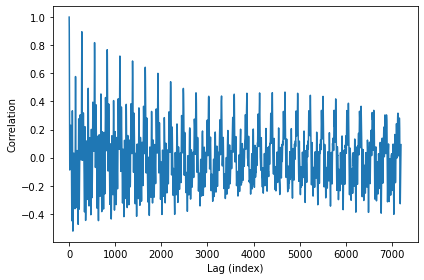

In [22]:
segment = wave.segment(start=1.85, duration=0.3)
lags, corrs = autocorr(segment)
plt.plot(lags, corrs)
decorate(xlabel='Lag (index)', ylabel='Correlation')

In [23]:
freq = estimate_fundamental(segment,low=100,high=7000)
freq

174.54545454545456

### 두번째 음은 fundamental 값으로 174 freq를 가지며, 174 freq는 파 음의 전형적인 주파수 입니다.

### 세번째 음을 살펴보겠습니다.

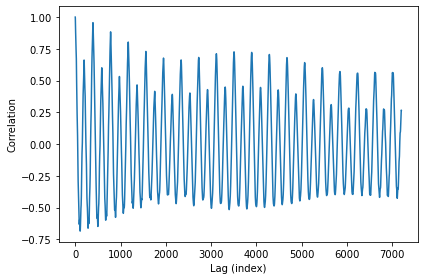

In [24]:
segment = wave.segment(start=2.4, duration=0.3)
lags, corrs = autocorr(segment)
plt.plot(lags, corrs)
decorate(xlabel='Lag (index)', ylabel='Correlation')

In [25]:
freq = estimate_fundamental(segment,low=100,high=7000)
freq

123.07692307692307

### 세번째 음은 fundamental 값으로 123 freq를 가지며, 123 freq는 시 음의 전형적인 주파수 입니다.

### 네번째 음을 살펴보겠습니다.

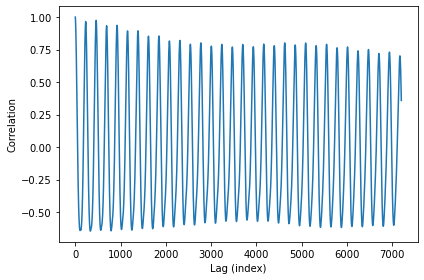

In [26]:
segment = wave.segment(start=2.95, duration=0.3)
lags, corrs = autocorr(segment)
plt.plot(lags, corrs)
decorate(xlabel='Lag (index)', ylabel='Correlation')

In [27]:
freq = estimate_fundamental(segment,low=100,high=7000)
freq

103.8961038961039

### 네번째 음은 fundamental 값으로 103 freq를 가지며, 103 freq는 솔샾 음의 전형적인 주파수 입니다.

### 다섯번째 음을 살펴보겠습니다.

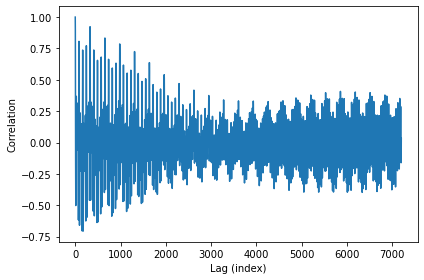

In [28]:
segment = wave.segment(start=3.5, duration=0.3)
lags, corrs = autocorr(segment)
plt.plot(lags, corrs)
decorate(xlabel='Lag (index)', ylabel='Correlation')

In [29]:
freq = estimate_fundamental(segment,low=100,high=7000)
freq

146.78899082568807

### 다섯번째 음은 fundamental 값으로 146 freq를 가지며, 146 freq는 레 음의 전형적인 주파수 입니다.

# 즉 순서대로 나열하면 도, 파, 시, 솔샾, 레 순서를 발견할 수 있었습니다!!!

### 6. perfect_pitch를 분석해보고 디지털신호처리 관점에서 느낀점은?

### 단순 삐 소리에 불과했던 소리가, 뜯어놓고 보니 자신의 음계별 주파수를 정직하게 가지고 있다는 것을 확인하고 나니, 이래서 음악은 수학이자 과학이구나 라고 다시 한 번 생각하게 됐습니다. 지금까지 저는 절대음감이 아니기에, 소리를 듣고서 어떤 음계인지 못맞췄지만, 이제는 소리를 분석해 음계를 맞출 수 있게 되어서, 절대음감이 부럽지 않게 되었습니다. 감사합니다 교수님!